In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input
from keras.layers.merge import concatenate
import tensorflow as tf

In [2]:
#fix random seed-1 (or whatever other integer) for reproductibility
seed = 7
np.random.seed(seed)

In [3]:
#Generate data
N = 1000
X_train = np.linspace(0.0,1.0,N)
y_train = np.sin(2*np.pi*X_train)

X_val = np.random.rand(100)
X_val = np.sort(X_val)
y_val = np.sin(2*np.pi*X_val)

In [4]:
#Define model
x0_left = Input(shape = (1,))
x0_right = Input(shape = (1,))

x1_left = Dense(32,activation = 'sigmoid',kernel_initializer = "uniform")(x0_left)  
x1_right = Dense(32, activation = 'sigmoid', kernel_initializer = "uniform")(x0_right)

x2 = concatenate([x1_left,x1_right])
x3 = Dense(32, activation = 'sigmoid', kernel_initializer = "uniform")(x2)
x4 = Dense(1, kernel_initializer = "uniform")(x3)

model = Model(inputs = [x0_left,x0_right], outputs = x4)
model.compile(optimizer = 'rmsprop', loss = 'mse',metrics = ['mse'])
hist = model.fit([X_train,X_train],y_train,epochs = 400, batch_size = 32,verbose = 0,validation_data = ([X_val,X_val],y_val))
    

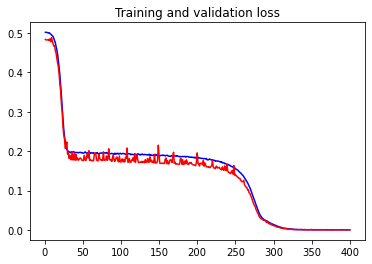

In [5]:
train_loss = hist.history['loss']
valid_loss = hist.history['val_loss']
ep = range(1, len(train_loss)+1)
plt.figure()
plt.plot(ep,train_loss,'b-')
plt.plot(ep,valid_loss,'r-')
plt.title('Training and validation loss')
plt.show()

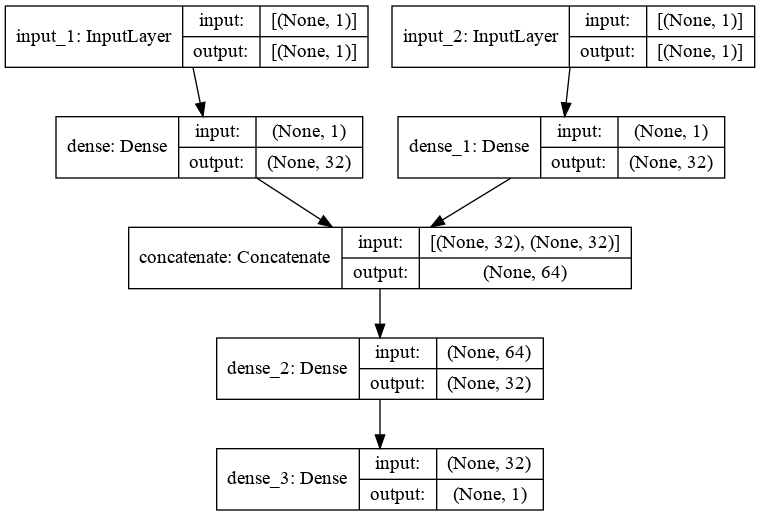

In [6]:
tf.keras.utils.plot_model(model,show_shapes = True)

In [13]:
y_sin = model.predict([X_val,X_val])

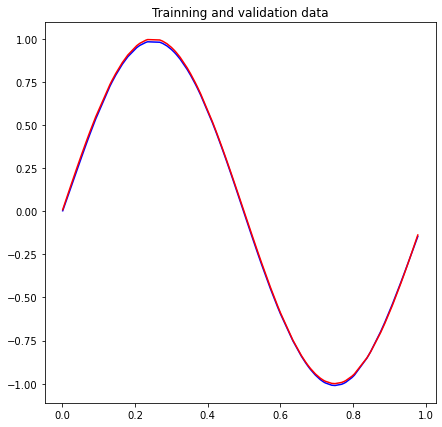

In [15]:
plt.figure(figsize = (7,7))
plt.plot(X_val,y_sin,'b')
plt.plot(X_val,y_val,'r')
plt.title('Trainning and validation data')
plt.show()